#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Loading and analyzing the dataset

In [2]:
data = pd.read_csv(r"C:\Users\Ananya\Desktop\SEM 4 ML\Experiment 1\Q2\food_truck_data (1).txt")
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
data.isnull().sum()

Population    0
Profit        0
dtype: int64

#### Scatterplot of Population vs. Profit

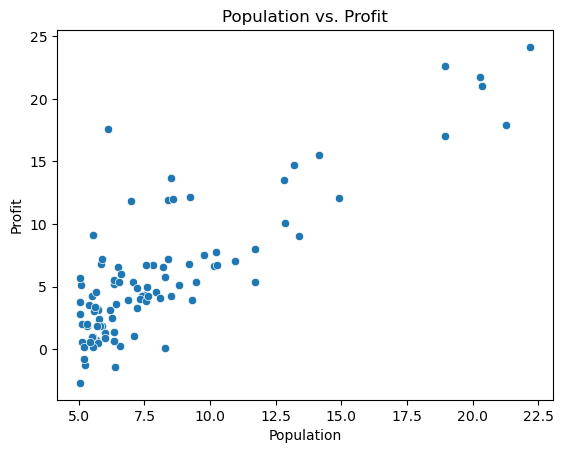

In [7]:
sns.scatterplot(data=data, x="Population", y="Profit").set(title="Population vs. Profit")
plt.show()

#### Appending 1's to the end of the dataset.

This is done to make it compatible for matrix multiplication as 
    h(x) = w0 + w1x
and we need to multiply 1 by w0 to maintain that while we multiply the population feature by w1.

In [8]:
data.insert(0, "ones", 1)
data

,ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


#### Setting the feature (X) and the target variable (y)

In [9]:
X = data[[data.columns[0], data.columns[1]]]
X


,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [10]:
y = data["Profit"]
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Profit, Length: 97, dtype: float64

In [11]:
X = np.matrix(X)
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [12]:
y = np.reshape(y, (len(y), 1))
y = np.matrix(y)
y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


#### Defining the cost function J

In [13]:
def cost_function(X, y, theta):
    # sum of squared differences between the actual result and our prediction.
    inner_product = np.power(((X * theta.T) - y) , 2) 
    return np.sum(inner_product) / (2 * len(X))

#### Defining the function for gradient descent

In [14]:
def gradient_descent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.flatten().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            grad_term = np.multiply(error, X[:,j]) # product of the error and the corresponding feature 
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(grad_term)) # update the value of theta
            
        theta = temp
        cost[i] = cost_function(X, y, theta)
    
    return theta, cost

In [15]:
theta = np.matrix([[0, 0]])
theta

matrix([[0, 0]])

In [16]:
initial_cost = cost_function(X, y, theta)
initial_cost

32.072733877455676

In [17]:
alpha = 0.01
iters = 1000

In [18]:
new_theta, cost = gradient_descent(X, y, theta, alpha, iters)
print(f"h(x) = {new_theta[0, 0]:.4f} + {new_theta[0,1]:.4f}x")

h(x) = -3.2414 + 1.1273x


In [19]:
minimized_cost = cost_function(X, y, new_theta)
minimized_cost

4.515955503078914

#### Visualizing the solution

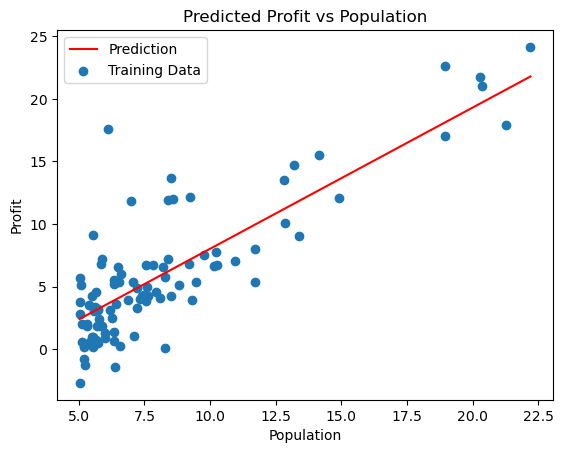

In [20]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
J = new_theta[0, 0] + (new_theta[0, 1] * x)

plt.plot(x, J, 'r', label='Prediction')
plt.scatter(data.Population, data.Profit, label='Training Data')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Predicted Profit vs Population")
plt.legend()
plt.show()

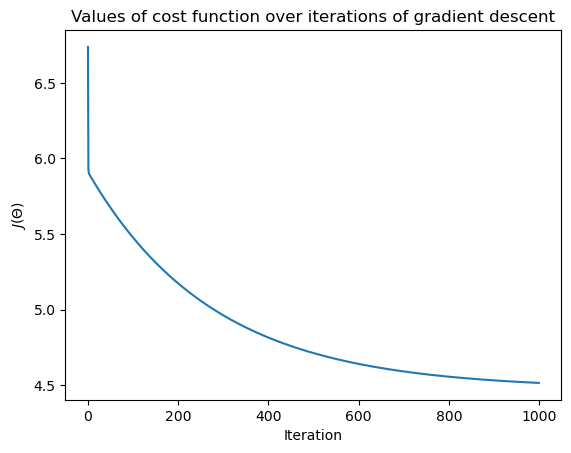

In [21]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")
plt.show()

#### Implementing Linear Regression using Scikit-Learn

In [22]:
X1 = data[['Population']]
y1 = data['Profit']

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=7)

In [24]:
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [25]:
predictions = regressor.predict(X1_test)
predictions

array([ 3.63690234,  4.9677503 ,  5.20489546,  6.08387789,  2.28653436,
        2.69610647,  2.61012538,  2.95974311, 11.35068484,  4.83262054,
        6.21552192,  2.82472955,  2.61279776,  3.1081186 ,  4.01661346,
        4.44256846, 12.90299221,  2.72805891,  3.91634091,  6.08190265])

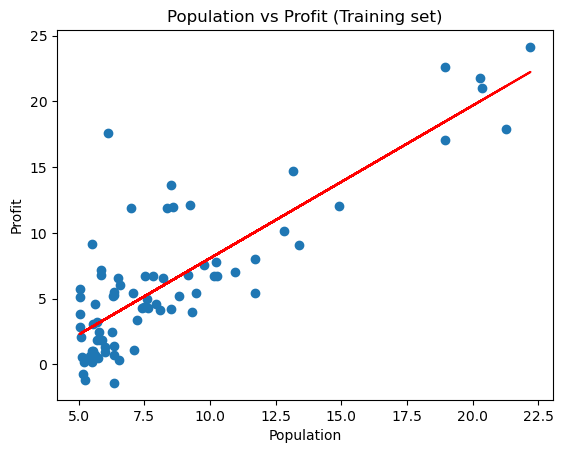

In [26]:
plt.scatter(X1_train, y1_train)
plt.plot(X1_train, regressor.predict(X1_train),'r')
plt.title('Population vs Profit (Training set)')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

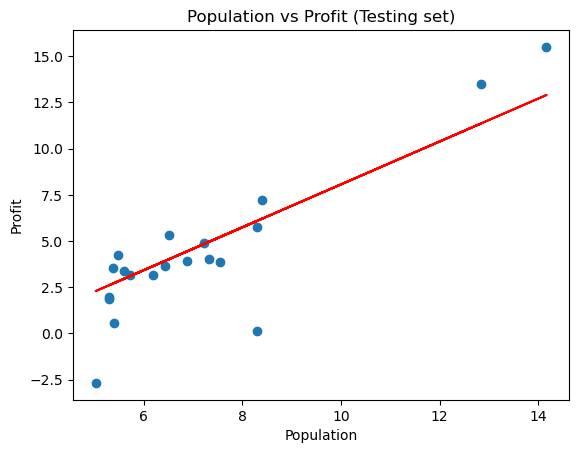

In [27]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, predictions,'r')
plt.title('Population vs Profit (Testing set)')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

#### Evaluating the model

 Mean Squared Error(MSE) - the better the model fits the data, the less the MSE score.

In [28]:
MSE_score = mean_squared_error(y1_test, predictions)
MSE_score

4.303883384543662